In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read Data from excel

In [246]:
Open_Hours_data=pd.read_excel(r'C:\Users\IN22912959\OneDrive - Tesco\Documents\Energy Forecast\Open_hrs_data.xlsx')
Temperature_data=pd.read_excel(r'Downloads/Energy_Forecast.xlsx',sheet_name='Daily Max Temperature')
CHP_Energy_data_2017=pd.read_excel(r'C:\Users\IN22912959\OneDrive - Tesco\Documents\Energy Forecast\CHP-Bio 2017.xlsx')
CHP_Energy_data_2019=pd.read_excel(r'Downloads/Energy_Forecast.xlsx',sheet_name='19-20 GAS&BIO CHP')
CHP_Energy_data_2018=pd.read_excel(r'C:\Users\IN22912959\OneDrive - Tesco\Documents\Energy Forecast\2018-2019 CHP and Grid data.xlsx',sheet_name='2018-2019 Bio and Gas CHP')
Energy_Data_2018=pd.read_excel(r'C:\Users\IN22912959\OneDrive - Tesco\Documents\Energy Forecast\Energy Data 18-19.xlsx')
Energy_Data_2019=pd.read_excel(r'C:\Users\IN22912959\OneDrive - Tesco\Documents\Energy Forecast\2019-2020 grid consumption.xlsx')
Energy_Data_2017=pd.read_excel(r'C:\Users\IN22912959\OneDrive - Tesco\Documents\Energy Forecast\Energy Data 2017.xlsx',sheet_name='Sheet1')
transactions=pd.read_excel(r'C:\Users\IN22912959\OneDrive - Tesco\Documents\Energy Forecast\Transaction_Details.xlsx')
open_close_ind=pd.read_excel(r'Downloads/Energy_Forecast.xlsx',sheet_name='OC_YWN')
assets_data=pd.read_excel(r'C:\Users\IN22912959\OneDrive - Tesco\Documents\Energy Forecast\Assets_Data.xlsx')

### Copy data

In [413]:
OHD=Open_Hours_data.copy()
TD=Temperature_data.copy()
ED_CHP_2017=CHP_Energy_data_2017.copy()
ED_CHP_2019=CHP_Energy_data_2019.copy()
ED_CHP_2018=CHP_Energy_data_2018.copy()
ED_2018=Energy_Data_2018.copy()
ED_2019=Energy_Data_2019.copy()
ED_2017=Energy_Data_2017.copy()
ED_2019=ED_2019.drop(['YTD'],axis=1)
ED_2019.head()
transaction_count=transactions.copy()
oc_ind=open_close_ind.copy()
assets=assets_data.copy()

In [414]:
ED_2017=ED_2017.melt(id_vars=['Store no','Store name','Store form','Weather region'],
                    var_name='Weeks',
                    value_name='Energy_Consumed')
ED_2017['Year']='2017'
ED_2017['Week_Number']=ED_2017['Weeks'].str[-2:].astype('int')
ED_2017.head()

,Store no,Store name,Store form,Weather region,Weeks,Energy_Consumed,Year,Week_Number
0,2001,PITTODRIE EXPRESS,Express,East Scotland,Week 1,4781.6,2017,1
1,2002,ABERGELE,Superstore,Wales,Week 1,29344.2,2017,1
2,2004,ADDISCOMBE EXPRESS,Express,Greater London,Week 1,4021.3,2017,1
3,2005,ABINGTON EXPRESS,Express,Midlands,Week 1,4746.0,2017,1
4,2006,ABERTILLERY,Superstore,Wales,Week 1,17106.9,2017,1


In [415]:


### Convert weeks from columns to rows from Energy data & extract week_number from Year_Week_Number

ED_2018=ED_2018.melt(id_vars=['Store no','Store name','Store form','Weather region'],
                    var_name='Weeks',
                    value_name='Energy_Consumed')
ED_2018['Year']='2018'

ED_2019=ED_2019.melt(id_vars=['Store no','Store name','Store form','Weather region'],
                    var_name='Weeks',
                    value_name='Energy_Consumed')

ED_2018['Week_Number']=ED_2018['Weeks'].str[-2:].astype('int')

ED_2019['Year']='2019'
ED_2019['Week_Number']=ED_2019['Weeks'].str[-2:].astype('int')
ED_2019.head()

,Store no,Store name,Store form,Weather region,Weeks,Energy_Consumed,Year,Week_Number
0,2001.0,PITTODRIE EXPRESS,Express,East Scotland,Week_01,4485.0,2019,1
1,2002.0,ABERGELE,Superstore,Wales,Week_01,28130.9,2019,1
2,2012.0,ACTON EXPRESS,Express,Greater London,Week_01,4905.6,2019,1
3,2080.0,BASINGSTOKE,Superstore,SE England,Week_01,48438.2,2019,1
4,2120.0,BASINGSTOKE METRO,Metro,SE England,Week_01,16569.7,2019,1


In [416]:
ED_2017[(ED_2017['Store no']==2087) & (ED_2017['Year']=='2017')].head()

,Store no,Store name,Store form,Weather region,Weeks,Energy_Consumed,Year,Week_Number
51,2087,BEDFORD 1,Superstore,NaN,Week 1,65515.4,2017,1
2588,2087,BEDFORD 1,Superstore,NaN,Week 2,67417.9,2017,2
5125,2087,BEDFORD 1,Superstore,NaN,Week 3,68791.1,2017,3
7662,2087,BEDFORD 1,Superstore,NaN,Week 4,67610.8,2017,4
10199,2087,BEDFORD 1,Superstore,NaN,Week 5,69117.5,2017,5


### Store 2018 2019 data in one dataframe

In [417]:
ED_17_18_19=pd.concat([ED_2018,ED_2019,ED_2017])

# ED_17_18_19[(ED_17_18_19['Store no']==2087) & (ED_17_18_19['Year']=='2017')].head()
ED_17_18_19.head()

,Store no,Store name,Store form,Weather region,Weeks,Energy_Consumed,Year,Week_Number
0,2001.0,PITTODRIE EXPRESS,Express,East Scotland,Week 1,4747.4,2018,1
1,2002.0,ABERGELE,Superstore,Wales,Week 1,26518.0,2018,1
2,2004.0,ADDISCOMBE EXPRESS,Express,Greater London,Week 1,4222.2,2018,1
3,2005.0,ABINGTON EXPRESS,Express,Midlands,Week 1,4353.5,2018,1
4,2006.0,ABERTILLERY,Superstore,Wales,Week 1,17111.6,2018,1


### Get Open Hours Data 

In [418]:
ED_17_18_19=ED_17_18_19.fillna(0)
ED_17_18_19['Store no']=ED_17_18_19['Store no'].astype(int)

In [419]:

OHD.dtypes
OHD.replace('CLOSED',0.0,inplace=True)
OHD['OPEN.5']=OHD['OPEN.5'].astype('float32')
OHD['Open_hr']=OHD[['OPEN','OPEN.1','OPEN.2','OPEN.3','OPEN.4','OPEN.5','OPEN.6']].sum(axis=1)
OHD['Closed_hr']=OHD[['CLOSE','CLOSE.1','CLOSE.2','CLOSE.3','CLOSE.4','CLOSE.5','CLOSE.6']].sum(axis=1)
OHD['Total_Open_Hrs']=OHD['Closed_hr']-OHD['Open_hr']
OHD.head()

,Store Number,Name,Old_Weather_Region,Store_size,OPEN,CLOSE,OPEN.1,CLOSE.1,OPEN.2,CLOSE.2,...,CLOSE.3,OPEN.4,CLOSE.4,OPEN.5,CLOSE.5,OPEN.6,CLOSE.6,Open_hr,Closed_hr,Total_Open_Hrs
0,2001,PITTODRIE EXPRESS,East Scotland,2063.0,6.00,23.59,6.00,23.59,6.00,23.59,...,23.59,6.00,23.59,6.00,23.59,6.00,23.59,42.00,165.13,123.13
1,2004,ADDISCOMBE EXPRESS,Greater London,2185.0,6.00,23.59,6.00,23.59,6.00,23.59,...,23.59,6.00,23.59,6.00,23.59,6.00,23.59,42.00,165.13,123.13
2,2005,ABINGTON EXPRESS,Midlands,1658.0,6.00,23.59,6.00,23.59,6.00,23.59,...,23.59,6.00,23.59,6.00,23.59,6.00,23.59,42.00,165.13,123.13
3,2012,ACTON EXPRESS,Greater London,2696.0,0.01,23.59,0.01,23.59,0.01,23.59,...,23.59,0.01,23.59,0.01,23.59,0.01,23.59,0.07,165.13,165.06
4,2013,SWINDON ABBEY MDS EXP,South Cen England,2828.0,6.00,22.00,6.00,22.00,6.00,22.00,...,22.00,6.00,22.00,6.00,22.00,6.00,22.00,42.00,154.00,112.00


In [420]:
# import datetime
# print(datetime.datetime.fromtimestamp(6))

### CHP_Gas_Energy_Data

In [421]:

ED_CHP_2019=ED_CHP_2019.melt(id_vars=['Tesco ID','Store name','Store format','CHP Type','Region'],
                                     var_name='Weeks',
                                     value_name='Energy_Consumed')
ED_CHP_2018=ED_CHP_2018.melt(id_vars=['Tesco ID','Store name','Store format','CHP type','Region'],
                                     var_name='Weeks',
                                     value_name='Energy_Consumed')
ED_CHP_2017=ED_CHP_2017.melt(id_vars=['Tesco ID','Store name','Store format','CHP type','Region'],
                                     var_name='Weeks',
                                     value_name='Energy_Consumed')

In [422]:
ED_CHP_2019['Year']='2019'
ED_CHP_2019['Week_Number']=ED_CHP_2019['Weeks'].str[-2:].astype('int')
ED_CHP_2018['Year']='2018'
ED_CHP_2018['Week_Number']=ED_CHP_2018['Weeks'].str[-2:].astype('int')
ED_CHP_2017['Year']='2017'
ED_CHP_2017['Week_Number']=ED_CHP_2018['Weeks'].str[-2:].astype('int')

ED_CHP_2017.head()


,Tesco ID,Store name,Store format,CHP type,Region,Weeks,Energy_Consumed,Year,Week_Number
0,2030,ANDOVER,Extra,Gas,South Cen England,Week 1,0.0,2017,1
1,2042,AYR,Extra,Gas,West Scotland,Week 1,38207.0,2017,1
2,2047,ASHFORD,Extra,Gas,Greater London,Week 1,14234.0,2017,1
3,2142,BURY,Superstore,Gas,NW England,Week 1,18444.0,2017,1
4,2168,BRADFORD PEEL CENTRE,Superstore,Gas,NE England,Week 1,23856.0,2017,1


In [423]:
CHP_17_18_19=pd.concat([ED_CHP_2018,ED_CHP_2019,ED_CHP_2017],ignore_index=True)
# CHP_17_18_19.to_excel('check.xlsx')
CHP_17_18_19=CHP_17_18_19.rename(columns={'Tesco ID':'Store no'})
CHP_17_18_19.head()

,Store no,Store name,Store format,CHP type,Region,Weeks,Energy_Consumed,Year,Week_Number,CHP Type
0,2030,ANDOVER,Extra,Gas,South Cen England,Week 1,19776.0,2018,1,NaN
1,2042,AYR,Extra,Gas,West Scotland,Week 1,2044.0,2018,1,NaN
2,2047,ASHFORD,Extra,Gas,Greater London,Week 1,0.0,2018,1,NaN
3,2142,BURY,Superstore,Gas,NW England,Week 1,24900.0,2018,1,NaN
4,2168,BRADFORD PEEL CENTRE,Superstore,Gas,NE England,Week 1,24236.0,2018,1,NaN


In [424]:
# CHP_18_19.loc[CHP_18_19['Year']=='2019']

### Temperature Data: Get average of daily max temperature as week Max_Temp 

In [425]:

TD=TD.drop(['Lookup','Date'],axis=1)
TD=TD.melt(id_vars=['Year','Week','Day'],
                        var_name='Region',
                        value_name='Max_temp')


In [426]:
TD=TD.fillna(0)
TD['Week']=TD['Week'].astype('int').astype('str')
TD['Week_Number']=TD['Week'].str[-2:].astype('int')
TD['Year']=TD['Week'].str[0:4]
TD=TD.groupby(['Year','Week_Number','Region'])['Max_temp'].mean().to_frame(name='Max_Temp').reset_index()
TD=TD.rename(columns={'Region':"Weather region"})
TD.head(100)

,Year,Week_Number,Weather region,Max_Temp
0,0,0,East Anglia,1.163265
1,0,0,East Scotland,1.122449
2,0,0,Greater London,1.346939
3,0,0,Midlands,1.183673
4,0,0,Midlands / Anglia,1.173469
...,...,...,...,...
95,2017,5,NE England,13.714286
96,2017,5,NI,14.571429
97,2017,5,NW England,14.285714
98,2017,5,National,14.820423


In [427]:
OHD_New=OHD.rename(columns={'Name':'Store name','Store Number':'Store no'})
OHD_New[OHD_New['Store no']==2087]

# OHD_New.dtypes

,Store no,Store name,Old_Weather_Region,Store_size,OPEN,CLOSE,OPEN.1,CLOSE.1,OPEN.2,CLOSE.2,...,CLOSE.3,OPEN.4,CLOSE.4,OPEN.5,CLOSE.5,OPEN.6,CLOSE.6,Open_hr,Closed_hr,Total_Open_Hrs
1926,2087,BEDFORD 1,SE England,57480.0,6.0,23.59,6.0,23.59,6.0,23.59,...,23.59,6.0,23.59,6.0,23.59,10.0,16.0,46.0,157.54,111.54


### Merge Energy and Open Hours Data based on Store name

In [437]:
ED_17_18_19.head()
OHD_New['Store no']=OHD_New['Store no'].astype(float)
OHD_New.head()
Energy_OpenHrs=pd.merge(ED_17_18_19,
                       OHD_New[['Store no','Total_Open_Hrs','Store_size']],
                       on='Store no')
Energy_OpenHrs.head()

Energy_OpenHrs[Energy_OpenHrs['Store no']==2087.0]

,Store no,Store name,Store form,Weather region,Weeks,Energy_Consumed,Year,Week_Number,Total_Open_Hrs,Store_size
7956,2087,BEDFORD 1,Superstore,0,Week 1,54693.4,2018,1,111.54,57480.0
7957,2087,BEDFORD 1,Superstore,0,Week 2,55481.7,2018,2,111.54,57480.0
7958,2087,BEDFORD 1,Superstore,0,Week 3,56020.3,2018,3,111.54,57480.0
7959,2087,BEDFORD 1,Superstore,0,Week 4,57225.1,2018,4,111.54,57480.0
7960,2087,BEDFORD 1,Superstore,0,Week 5,56771.7,2018,5,111.54,57480.0
...,...,...,...,...,...,...,...,...,...,...
8055,2087,BEDFORD 1,Superstore,0,Week 48,67211.2,2017,48,111.54,57480.0
8056,2087,BEDFORD 1,Superstore,0,Week 49,62565.7,2017,49,111.54,57480.0
8057,2087,BEDFORD 1,Superstore,0,Week 50,58594.6,2017,50,111.54,57480.0
8058,2087,BEDFORD 1,Superstore,0,Week 51,57887.2,2017,51,111.54,57480.0


In [438]:
Energy_OpenHrs.head()

,Store no,Store name,Store form,Weather region,Weeks,Energy_Consumed,Year,Week_Number,Total_Open_Hrs,Store_size
0,2001,PITTODRIE EXPRESS,Express,East Scotland,Week 1,4747.4,2018,1,123.13,2063.0
1,2001,PITTODRIE EXPRESS,Express,East Scotland,Week 2,4714.3,2018,2,123.13,2063.0
2,2001,PITTODRIE EXPRESS,Express,East Scotland,Week 3,4434.5,2018,3,123.13,2063.0
3,2001,PITTODRIE EXPRESS,Express,East Scotland,Week 4,4487.3,2018,4,123.13,2063.0
4,2001,PITTODRIE EXPRESS,Express,East Scotland,Week 5,4319.7,2018,5,123.13,2063.0


### Merge the above data with Temerature data based on Week , Year & Weather Reagion

In [439]:
E_T_O_data=pd.merge(Energy_OpenHrs,
                    TD[['Year','Week_Number','Weather region','Max_Temp']],
                    on=['Year','Week_Number','Weather region'],
                    how='left'
                   )
E_T_O_data.drop_duplicates(keep=False,inplace=True)

E_T_O_data['Year'].unique()

array(['2018', '2019', '2017'], dtype=object)

In [440]:
E_T_O_data[E_T_O_data['Store no']==2087.0]

,Store no,Store name,Store form,Weather region,Weeks,Energy_Consumed,Year,Week_Number,Total_Open_Hrs,Store_size,Max_Temp
7956,2087,BEDFORD 1,Superstore,0,Week 1,54693.4,2018,1,111.54,57480.0,NaN
7957,2087,BEDFORD 1,Superstore,0,Week 2,55481.7,2018,2,111.54,57480.0,NaN
7958,2087,BEDFORD 1,Superstore,0,Week 3,56020.3,2018,3,111.54,57480.0,NaN
7959,2087,BEDFORD 1,Superstore,0,Week 4,57225.1,2018,4,111.54,57480.0,NaN
7960,2087,BEDFORD 1,Superstore,0,Week 5,56771.7,2018,5,111.54,57480.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8055,2087,BEDFORD 1,Superstore,0,Week 48,67211.2,2017,48,111.54,57480.0,NaN
8056,2087,BEDFORD 1,Superstore,0,Week 49,62565.7,2017,49,111.54,57480.0,NaN
8057,2087,BEDFORD 1,Superstore,0,Week 50,58594.6,2017,50,111.54,57480.0,NaN
8058,2087,BEDFORD 1,Superstore,0,Week 51,57887.2,2017,51,111.54,57480.0,NaN


In [441]:
E_T_O_data['Year']=E_T_O_data['Year'].astype(int)
All=pd.merge(E_T_O_data,
            transaction_count[['Transaction_Count','Year','Week_Number','channel','Store name']],
            on=['Year','Week_Number','Store name']
            )
All['Year'].unique()

array([2018, 2019, 2017])

In [442]:
All[All['Store no']==2087]

,Store no,Store name,Store form,Weather region,Weeks,Energy_Consumed,Year,Week_Number,Total_Open_Hrs,Store_size,Max_Temp,Transaction_Count,channel
7724,2087,BEDFORD 1,Superstore,0,Week 1,54693.4,2018,1,111.54,57480.0,NaN,40834,Large
7725,2087,BEDFORD 1,Superstore,0,Week 2,55481.7,2018,2,111.54,57480.0,NaN,45511,Large
7726,2087,BEDFORD 1,Superstore,0,Week 3,56020.3,2018,3,111.54,57480.0,NaN,42472,Large
7727,2087,BEDFORD 1,Superstore,0,Week 4,57225.1,2018,4,111.54,57480.0,NaN,42903,Large
7728,2087,BEDFORD 1,Superstore,0,Week 5,56771.7,2018,5,111.54,57480.0,NaN,43253,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7821,2087,BEDFORD 1,Superstore,0,Week 47,66747.0,2017,47,111.54,57480.0,NaN,41981,Large
7822,2087,BEDFORD 1,Superstore,0,Week 48,67211.2,2017,48,111.54,57480.0,NaN,41885,Large
7823,2087,BEDFORD 1,Superstore,0,Week 49,62565.7,2017,49,111.54,57480.0,NaN,42317,Large
7824,2087,BEDFORD 1,Superstore,0,Week 50,58594.6,2017,50,111.54,57480.0,NaN,42648,Large


In [443]:
store_equipments=assets.groupby(['Store Number'])['Asset Tag No.'].count().to_frame(name='No_of_Equipments').reset_index()

store_equipments=store_equipments.rename(columns={'Store Number':'Store no'})
store_equipments.head()

In [445]:
Full_data=pd.merge(All,
                  store_equipments,
                  on=['Store no'],
                  how='left')
Full_data.head()

,Store no,Store name,Store form,Weather region,Weeks,Energy_Consumed,Year,Week_Number,Total_Open_Hrs,Store_size,Max_Temp,Transaction_Count,channel,No_of_Equipments
0,2001,PITTODRIE EXPRESS,Express,East Scotland,Week 1,4747.4,2018,1,123.13,2063.0,1.285714,17909,Convenience,79.0
1,2001,PITTODRIE EXPRESS,Express,East Scotland,Week 2,4714.3,2018,2,123.13,2063.0,6.142857,18220,Convenience,79.0
2,2001,PITTODRIE EXPRESS,Express,East Scotland,Week 3,4434.5,2018,3,123.13,2063.0,4.857143,18875,Convenience,79.0
3,2001,PITTODRIE EXPRESS,Express,East Scotland,Week 4,4487.3,2018,4,123.13,2063.0,9.714286,19774,Convenience,79.0
4,2001,PITTODRIE EXPRESS,Express,East Scotland,Week 5,4319.7,2018,5,123.13,2063.0,6.571429,18510,Convenience,79.0


In [447]:
Full_data[(Full_data['Store no']==2087)].head()

,Store no,Store name,Store form,Weather region,Weeks,Energy_Consumed,Year,Week_Number,Total_Open_Hrs,Store_size,Max_Temp,Transaction_Count,channel,No_of_Equipments
7724,2087,BEDFORD 1,Superstore,0,Week 1,54693.4,2018,1,111.54,57480.0,NaN,40834,Large,457.0
7725,2087,BEDFORD 1,Superstore,0,Week 2,55481.7,2018,2,111.54,57480.0,NaN,45511,Large,457.0
7726,2087,BEDFORD 1,Superstore,0,Week 3,56020.3,2018,3,111.54,57480.0,NaN,42472,Large,457.0
7727,2087,BEDFORD 1,Superstore,0,Week 4,57225.1,2018,4,111.54,57480.0,NaN,42903,Large,457.0
7728,2087,BEDFORD 1,Superstore,0,Week 5,56771.7,2018,5,111.54,57480.0,NaN,43253,Large,457.0


In [449]:
Full_data.to_excel('Energy_output.xlsx')
CHP_17_18_19.head()
Full_data[(Full_data['Store no']==2030) & (Full_data['Year']==2018)].head()

,Store no,Store name,Store form,Weather region,Weeks,Energy_Consumed,Year,Week_Number,Total_Open_Hrs,Store_size,Max_Temp,Transaction_Count,channel,No_of_Equipments
2652,2030,ANDOVER EXTRA,Extra,South Cen England,Week 1,40946.0,2018,1,147.48,38278.0,3.142857,49013,Large,562.0
2653,2030,ANDOVER EXTRA,Extra,South Cen England,Week 2,59386.7,2018,2,147.48,38278.0,10.571429,57578,Large,562.0
2654,2030,ANDOVER EXTRA,Extra,South Cen England,Week 3,60136.8,2018,3,147.48,38278.0,8.714286,51068,Large,562.0
2655,2030,ANDOVER EXTRA,Extra,South Cen England,Week 4,61588.9,2018,4,147.48,38278.0,8.857143,52700,Large,562.0
2656,2030,ANDOVER EXTRA,Extra,South Cen England,Week 5,60868.8,2018,5,147.48,38278.0,10.142857,53491,Large,562.0


In [459]:
missing_values = ["n/a", "na", "0"]
Comb_data=pd.read_excel(r'C:\Users\IN22912959\check.xlsx',na_values = missing_values)
Energy_data=pd.read_excel(r'C:\Users\IN22912959\Energy_output.xlsx',na_values = missing_values)

In [460]:
CHP_data=Comb_data.copy()
Energy=Energy_data.copy()
CHP_data=CHP_data.fillna(0)
Energy=Energy.fillna(0)
Energy.head()

,Unnamed: 0,Store no,Store name,Store form,Weather region,Weeks,Energy_Consumed,Year,Week_Number,Total_Open_Hrs,Store_size,Max_Temp,Transaction_Count,channel,No_of_Equipments
0,0,2001,PITTODRIE EXPRESS,Express,East Scotland,Week 1,4747.4,2018,1,123.13,2063.0,1.285714,17909.0,Convenience,79.0
1,1,2002,ABERGELE,Superstore,Wales,Week 1,26518.0,2018,1,102.00,24828.0,1.714286,25126.0,Large,245.0
2,2,2004,ADDISCOMBE EXPRESS,Express,Greater London,Week 1,4222.2,2018,1,123.13,2185.0,2.428571,13162.0,Convenience,69.0
3,3,2005,ABINGTON EXPRESS,Express,Midlands,Week 1,4353.5,2018,1,123.13,1658.0,0.142857,9001.0,Convenience,47.0
4,4,2006,ABERTILLERY,Superstore,Wales,Week 1,17111.6,2018,1,89.00,17847.0,1.714286,15849.0,Large,165.0


In [461]:
df = Energy.groupby(['Store no','Week_Number','Year']).sum().add(CHP_data.groupby(['Store no','Week_Number','Year']).sum(), fill_value=0).reset_index()
df[(df['Store no']==2030) & (df['Year']==2018)].head()

,Store no,Week_Number,Year,Energy_Consumed,Max_Temp,No_of_Equipments,Store_size,Total_Open_Hrs,Transaction_Count,Unnamed: 0
2861,2030,1,2018,60722.0,3.142857,562.0,38278.0,147.48,49013.0,18.0
2864,2030,2,2018,60262.7,10.571429,562.0,38278.0,147.48,57578.0,2733.0
2867,2030,3,2018,60136.8,8.714286,562.0,38278.0,147.48,51068.0,5448.0
2870,2030,4,2018,61588.9,8.857143,562.0,38278.0,147.48,52700.0,8163.0
2873,2030,5,2018,60868.8,10.142857,562.0,38278.0,147.48,53491.0,10878.0


In [453]:
df.to_excel('Energy_output.xlsx')
# df[(df['Store no']==2087) & (df['Year']==2017)].head()
# Energy[(Energy['Store no']==2087) & (Energy['Year']=='2017')].head()


In [457]:
len(df['Store no'][(df['Year']==2019)].unique())

2412

### Treating Energy Missing Values

In [177]:
missing_values = ["n/a", "na", "0"]
Comb_data=pd.read_excel(r'C:\Users\IN22912959\Energy_output.xlsx',na_values = missing_values)

data=Comb_data.copy()
data.isnull().sum()

data=data.sort_values(['Store name','Year','Week_Number'],ascending=(True,True,True))

data['Energy_Consumed'] = data['Energy_Consumed'].fillna((data['Energy_Consumed'].shift() + data['Energy_Consumed'].shift(-1))/2)
data.isnull().sum()

fill=data[['Store name','Week_Number','Year','Energy_Consumed']][data.isnull().any(axis=1)]
data_1=data.groupby(['Store name','Year'])['Energy_Consumed'].mean().to_frame(name='mean_energy').reset_index()
remove_stores=data_1['Store name'][data_1.isnull().any(axis=1)]
remove_stores=remove_stores.to_frame(name='store name').reset_index()
remove_stores.head()
cond=data['Store name'].isin(remove_stores['store name'])
data.drop(data[cond].index,inplace=True)
data.isnull().sum()

while pd.isnull(data['Energy_Consumed']).any():
    data['Energy_Consumed'] = data['Energy_Consumed'].fillna(data['Energy_Consumed'].rolling(2).mean().shift())

data.isnull().sum()
data.to_excel('Energy_Output2.xlsx')

KeyError: 'Store name'

In [61]:
# missing_values = ["n/a", "na", "0"]
# Comb_data=pd.read_excel(r'C:\Users\IN22912959\Energy_output.xlsx',na_values = missing_values)

# data=Comb_data.copy()
# data.isnull().sum()

# data=data.sort_values(['Store name','Year','Week_Number'],ascending=(True,True,False))

# data['Energy_Consumed'] = data['Energy_Consumed'].fillna((data['Energy_Consumed'].shift() + data['Energy_Consumed'].shift(-1))/2)
# data.isnull().sum()
# #fill by taking mean of week before and after

# #remove store with all zeroes for year 2019
# # fill=data[['Store name','Week_Number','Year','Energy_Consumed']][data.isnull().any(axis=1)]
# # data_1=data.groupby(['Store name','Year'])['Energy_Consumed'].mean().to_frame(name='mean_energy').reset_index()
# # remove_stores=data_1['Store name'][data_1.isnull().any(axis=1)]
# # remove_stores=remove_stores.to_frame(name='store name').reset_index()
# # remove_stores.head()
# # cond=data['Store name'].isin(remove_stores['store name'])
# # data.drop(data[cond].index,inplace=True)
# # data.isnull().sum()

# while pd.isnull(data['Energy_Consumed']).any():
#     data['Energy_Consumed'] = data['Energy_Consumed'].fillna(data['Energy_Consumed'].rolling(2).mean().shift())

# data.isnull().sum()

# data.to_excel('Energy_Output2.xlsx')

### Treat Open Hrs for two stores EXETER METRO & WEOLEY EXPRESS

In [35]:
#treating open hrs missing data
missing_values = ["n/a", "na", "0","-1.41","-14"]
Comb_data=pd.read_excel(r'C:\Users\IN22912959\Energy_output2.xlsx',na_values = missing_values)
data=Comb_data.copy()
data.head()
data['Total_Open_Hrs'][data['Total_Open_Hrs'] <0]=np.nan
data[data['Store name']=='SURREY QUAYS EXTRA']
# data.fillna(0)
data.isnull().sum()
fill=data[['Store name','Store form','Weather region','Week_Number','Year','Total_Open_Hrs']][data.isnull().any(axis=1)]
# fill.to_excel('a.xlsx')
mean_OH=data.groupby(['Store form','Week_Number','Year','Weather region'])['Total_Open_Hrs'].mean().to_frame(name='mean_open_hrs').reset_index()
mean_OH.head(1)
combined_df = pd.merge(fill, 
                       mean_OH,
                       how = 'left', 
                       on= ['Year','Week_Number','Store form','Weather region'] ,
                       suffixes= ('_m', '_n'), indicator= True)
combined_df.head()

f=pd.merge(data,
          combined_df[['Store name','Year','Week_Number','Store form','Total_Open_Hrs','mean_open_hrs']],
          how='left',
          on=['Store name','Year','Week_Number','Store form','Total_Open_Hrs']
          )

f['Total_Open_Hrs'][f['Total_Open_Hrs'].isnull()]=f['mean_open_hrs'][f['Total_Open_Hrs'].isnull()]

f.to_excel('Energy_Output_3.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [63]:


# f=pd.merge(data,
#           combined_df[['Store name','Year','Week_Number','Store form','Total_Open_Hrs','mean_open_hrs']],
#           how='left',
#           on=['Store name','Year','Week_Number','Store form','Total_Open_Hrs']
#           )




# # f=f.drop(['mean_open_hrs'],axis=1)
# f.to_excel('Energy_Output2.xlsx')

# # f[f['Store name']=='EXETER METRO']
# # data[data['Store name']=='EXETER METRO']
# f.isnull().sum()
# #We dont have any missing values now.

# # # All.head()
# # # All.to_excel('Energy_output.xlsx')
# # Fill_Missing=All.copy()

# # missing_values = ["n/a", "na", "0.0"]
# # Fill_Missing[['Energy_Consumed','Max_Temp']].replace(missing_values,np.nan,inplace=True)
# # Fill_Missing.isnull().sum()

# # # Fill_Missing_Values[Fill_Missing_Values['Store name']=='GLENROTHES STH PAK RD']
# # Fill_Missing_Values=Fill_Missing_Values.sort_values(['Store name','Year','Week_Number'],ascending=(True,True,False))
# # Fill_Missing_Values['Energy_Consumed'] = Fill_Missing_Values['Energy_Consumed'].fillna(Fill_Missing_Values['Energy_Consumed'].rolling(2).mean().shift())
# # Fill_Missing_Values[Fill_Missing_Values['Store name']=='GLENROTHES STH PAK RD'].head(52)

# # # Fill_Missing_Values.isnull().sum()
# # Fill_Missing_Values['Energy_Consumed'] = Fill_Missing_Values['Energy_Consumed'].fillna(Fill_Missing_Values['Energy_Consumed'].rolling(2).mean().shift())


# # while pd.isnull(Fill_Missing_Values['Energy_Consumed']).any():
# #     Fill_Missing_Values['Energy_Consumed'] = Fill_Missing_Values['Energy_Consumed'].fillna(Fill_Missing_Values['Energy_Consumed'].rolling(4).mean().shift())

# # Fill_Missing_Values[Fill_Missing_Values['Store name']=='HILLINGDON PIELD RD'].head(52)

# # Comb_data=pd.read_excel(r'C:\Users\IN22912959\Energy_output.xlsx')

# # data=Comb_data.copy()
# # import seaborn as sns

# # sns.set(style='whitegrid',palette='deep',font_scale=1.1,rc={'figure.figsize':[10,5]})

# # sns.distplot(
# # data['Energy_Consumed'],norm_hist=False,kde=False,bins=5,hist_kws={'alpha':1}).set(xlabel='Energy_Consumed',ylabel='Count');

# # data_2018=data.loc[data['Year']==2018]
# # data_2019=data.loc[data['Year']==2019]
# # data_2019.head()

# # colors = ["windows blue", "amber"]
# # sns.lineplot(x=data['Max_Temp'], y=data['Energy_Consumed'],hue=data['Year'])


# # t=data[data['Year']==2019].groupby('Week_Number')['Max_Temp'].mean().to_frame(name='Max_Temp').reset_index()
# # e=data[data['Year']==2019].groupby('Week_Number')['Energy_Consumed'].mean().to_frame(name='Energy_Consumed').reset_index()

# # et=data[data['Year']==2019].groupby('Week_Number')[['Max_Temp','Energy_Consumed']].mean()


# # sns.lineplot(x=et['Max_Temp'], y=et['Energy_Consumed'])

# # data.corr()

# # sns.heatmap(data.corr(), 
# #             xticklabels=data.corr().columns,
# #             yticklabels=data.corr().columns,
# #             cmap='RdBu_r',
# #             annot=True,
# #             linewidth=0.5)

# # sns.distplot(
# # data['Total_Open_Hrs'],norm_hist=False,kde=False,bins=5,hist_kws={'alpha':1}).set(xlabel='TOH',ylabel='Count');



### Analysis


In [69]:
play_data=f.copy()
sns.set()

In [70]:
play_data['Store form'].unique()

array(['Express', 'Superstore', 'Extra', 'Metro'], dtype=object)

In [71]:
x=play_data.groupby(['Store form','Year'])['Energy_Consumed'].mean().to_frame(name='Mean Energy').reset_index()
x.head()

,Store form,Year,Mean Energy
0,Express,2018,3827.210910
1,Express,2019,3700.321798
2,Extra,2017,13848.025189
3,Extra,2018,56388.780572
4,Extra,2019,52071.417027


In [67]:
# sns.distplot(x['Energy'],label='Sepal length')
sns.catplot(x='Store form',y='Energy',hue='Year',data=x)

ValueError: Could not interpret input 'Energy'

In [ ]:
express_data=play_data[play_data['Store form']=='Express']
superstore_data=play_data[play_data['Store form']=='Superstore']
extra_data=play_data[play_data['Store form']=='Extra']
metro_data=play_data[play_data['Store form']=='Metro']

In [ ]:
All.head()


In [ ]:
for i in play_data['Store form'].unique():
    sns.catplot(x='Week_Number',y='Energy_Consumed',data=play_data[play_data['Store form']==i])
    plt.title(i)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [ ]:
sns.relplot(x='Store_size',y='Energy_Consumed',hue='Store name',data=express_data)

In [ ]:
sns.relplot(x='Total_Open_Hrs',y='Energy_Consumed',hue='Store name',data=express_data)

In [ ]:
# sns.catplot(x='Store form',y='Energy_Consumed',hue='Year',kind='box',data=play_data,dodge=True)

In [ ]:
sns.relplot(x='Max_Temp',y='Energy_Consumed',hue='Store name',data=express_data)

In [ ]:
# t=play_data.groupby(['Weather region','Year','Week_Number','Store form'])[['Max_Temp','Energy_Consumed']].mean()
# for t.head()

In [ ]:


sns.lineplot(x='Max_Temp',y='Energy_Consumed',hue='Year',data=express_data)
sns.lineplot(x='Total_Open_Hrs',y='Energy_Consumed',hue='Year',data=express_data)
express_data.corr()

In [ ]:
# for i in play_data['Store form'].unique():
#     sns.lineplot(x='Max_Temp',y='Energy_Consumed',data=play_data[play_data['Store form']==i])
# #     
#     plt.title(i)
All.head()

In [ ]:
# sns.heatmap(express_data[['Energy_Consumed','Week_Number','Total_Open_Hrs','Store_size','Max_Temp','Transaction_Count']].corr(), 
#             xticklabels=express_data.corr().columns,
#             yticklabels=express_data.corr().columns,
#             cmap='RdBu_r',
#             annot=True,
#             linewidth=0.5)
express_data[['Energy_Consumed','Week_Number','Total_Open_Hrs','Store_size','Max_Temp','Transaction_Count']].corr()

In [ ]:
superstore_data[['Energy_Consumed','Week_Number','Total_Open_Hrs','Store_size','Max_Temp','Transaction_Count']].corr()

In [ ]:
metro_data[['Energy_Consumed','Week_Number','Total_Open_Hrs','Store_size','Max_Temp','Transaction_Count']].corr()

In [ ]:
extra_data[['Energy_Consumed','Week_Number','Total_Open_Hrs','Store_size','Max_Temp','Transaction_Count']].corr()

In [ ]:
sns.relplot(x='Store_size',y='Energy_Consumed',hue='Store name',data=extra_data)

In [ ]:
sns.boxplot(x=express_data['Energy_Consumed'])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(express_data['Store_size'], express_data['Energy_Consumed'])
ax.set_xlabel('Store size')
ax.set_ylabel('Energy_Consumed')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(express_data['Total_Open_Hrs'], express_data['Energy_Consumed'])
ax.set_xlabel('Store size')
ax.set_ylabel('Energy_Consumed')
plt.show()

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
# z = np.abs(stats.zscore(express_data))
# print(z)

In [ ]:
sns.heatmap(superstore_data.corr(), 
            xticklabels=superstore_data.corr().columns,
            yticklabels=superstore_data.corr().columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


In [ ]:
sns.heatmap(extra_data.corr(), 
            xticklabels=extra_data.corr().columns,
            yticklabels=extra_data.corr().columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [ ]:
for i in play_data['Store form'].unique():
    g = sns.lineplot(x="Total_Open_Hrs", y="Energy_Consumed", data=play_data[play_data['Store form']==i])
    g = (g.set(xlim=(50,200),ylim=(0,70000)))
    plt.title(i)
    plt.show(g)


In [ ]:
metro_data.corr()

In [ ]:
superstore_data.corr()

In [ ]:
extra_data.corr()

In [178]:
col_data=pd.read_excel(r'C:\Users\IN22912959\Energy_output_3.xlsx')

col_data=col_data.drop(['mean_open_hrs'],axis=1)

data=col_data.copy()
data.head()

store_5331=data[['Store no','Store name','Energy_Consumed','Year','Week_Number']][data['Store no']==6426]
store_5331.head()

import seaborn as sns
import matplotlib.pyplot as plt

# ax=sns.lineplot(x='Week_Number',y='Energy_Consumed',hue='Year',data=store_5331)


# ax=sns.lineplot(x='Week_Number',y='Energy_Consumed',hue='Year',marker='o',data=store_5331)

mean_values=store_5331.groupby(['Store no'])['Energy_Consumed'].mean().to_frame(name='mean').reset_index()
mean_values.head()

std_values=store_5331.groupby(['Store no'])['Energy_Consumed'].std().to_frame(name='std').reset_index()
std_values.head()

var=mean_values.join(std_values.set_index('Store no'), on='Store no')

var['coeff_var']=var['std']/var['mean']

var.head()

,Store no,mean,std,coeff_var
0,6426,481.962987,1088.871532,2.259243


In [73]:
uniq_stores=data['Store no'].unique()
col_names=('Store no','mean','std','coeff_var')

In [74]:
coeff_var=pd.DataFrame(columns=col_names)
results=[]
x=uniq_stores[0]

In [75]:
for i in uniq_stores:
    store=data[['Store no','Store name','Energy_Consumed','Year','Week_Number']][data['Store no']==i]
    
    mean_values=store.groupby(['Store no'])['Energy_Consumed'].mean().to_frame(name='mean').reset_index()
    mean_values.head()

    std_values=store.groupby(['Store no'])['Energy_Consumed'].std().to_frame(name='std').reset_index()
    std_values.head()

    var=mean_values.join(std_values.set_index('Store no'), on='Store no')
    var['coeff_var']=var['std']/var['mean']
    coeff_var=coeff_var.append(var)
    
    

In [76]:
coeff_var.head()

,Store no,mean,std,coeff_var
0,5912,4580.646154,588.379698,0.128449
0,2775,4305.398039,253.986612,0.058993
0,3474,5398.999038,496.643064,0.091988
0,2729,6574.012000,1250.123467,0.190161
0,6530,3401.662500,284.830695,0.083733


In [77]:
min_var=coeff_var[coeff_var['coeff_var']==min(coeff_var['coeff_var'])]
stores_to_check=coeff_var[coeff_var['coeff_var']>0.3]
stores_not_to_check=coeff_var[coeff_var['coeff_var']<0.3]

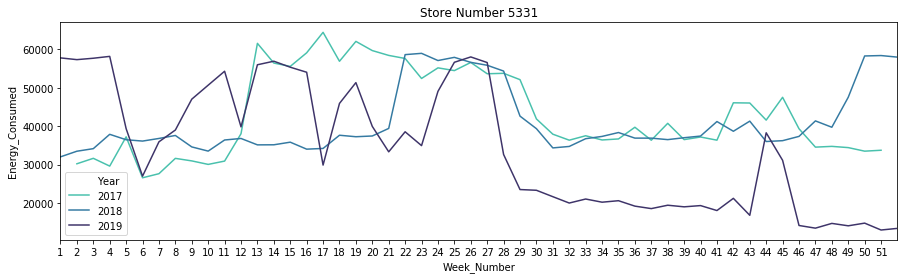

In [179]:
sns.color_palette("PuBuGn_d")
store=data[['Store no','Store name','Energy_Consumed','Year','Week_Number']][data['Store no']==5331]
store.head()
palette = sns.color_palette("mako_r", 3)
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)

ax.set_xlim(1,52)
ax.set_xticks(range(1,52))
ax=sns.lineplot(x='Week_Number',y='Energy_Consumed',hue='Year',palette=palette,data=store).set_title('Store Number 5331')


# ax=sns.lineplot(x='Week_Number',y='Energy_Consumed',hue='Year',marker='o',data=store)

In [180]:
stores_not_to_check.head()
min_var.head()


NameError: name 'stores_not_to_check' is not defined

In [92]:
a=data[['Energy_Consumed','Year','Week_Number','Total_Open_Hrs','Store_size','Max_Temp','Transaction_Count','No_of_Equipments']][data['Store no']==5331]
a.head()


,Energy_Consumed,Year,Week_Number,Total_Open_Hrs,Store_size,Max_Temp,Transaction_Count,No_of_Equipments
70888,30237.3,2017,2,147.48,61293,11.000000,41929,350
70889,31658.0,2017,3,147.48,61293,11.000000,42225,350
70890,29633.7,2017,4,147.48,61293,11.571429,45103,350
70891,37245.5,2017,5,147.48,61293,13.000000,42233,350
70892,26590.9,2017,6,147.48,61293,13.571429,44356,350


In [93]:
# X=a.values
# train_size=int(len(X)*0.80)
# train,test=X[0:train_size],X[train_size:len(X)]
# print("Observations: %d" % (len(X)))
# print("Training: %d" % (len(train)))

# print("Testing: %d" % (len(test)))




X=(a[['Year','Week_Number','Total_Open_Hrs','Store_size','Max_Temp','Transaction_Count','No_of_Equipments']])
y=(a['Energy_Consumed'])

In [94]:
train_size=int(len(X)*0.80)
X_train,X_test=X[0:train_size],X[train_size:len(X)]
y_train,y_test=y[0:train_size],y[train_size:len(X)]

In [95]:
y_train=y_train.to_frame()
y_test=y_test.to_frame()
# y_test

In [96]:
from sklearn.ensemble.forest import RandomForestRegressor

In [97]:
RF_Model = RandomForestRegressor(n_estimators=100,oob_score=True)

In [98]:
# y_train

In [99]:
labels = y_train.values[:,]
features = X_train.values[:,]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [100]:
# X_train.head(),y_train.head()

In [101]:
# X_test.head(),y_test.head()

In [102]:
X_test_predict=pd.DataFrame(
    rgr.predict(X_test.values[:,])).rename(
    columns={0:'predicted_energy'})
X_train_predict=pd.DataFrame(
    rgr.predict(X_train.values[:,])).rename(
    columns={0:'predicted_energy'})

In [87]:
# X_test_predict
q=pd.DataFrame()
q=X_test
q['ep']=X_test_predict['predicted_energy'].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


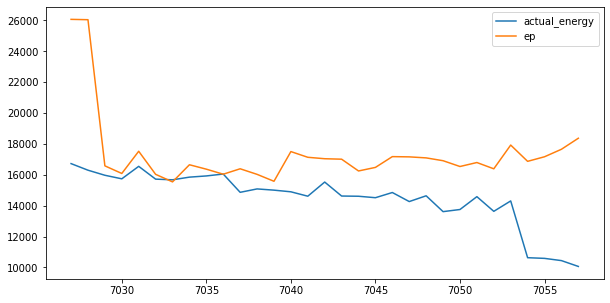

In [50]:
q['actual_energy']=y_test.values
q
q[['actual_energy','ep']].plot(figsize=(10,5))

In [103]:
RF_predict = X_train_predict.append(X_test_predict)

In [104]:
predict=pd.DataFrame()
predict=RF_predict.copy()
a['ec']=predict['predicted_energy'].values

In [105]:
# a.to_excel('check.xlsx')

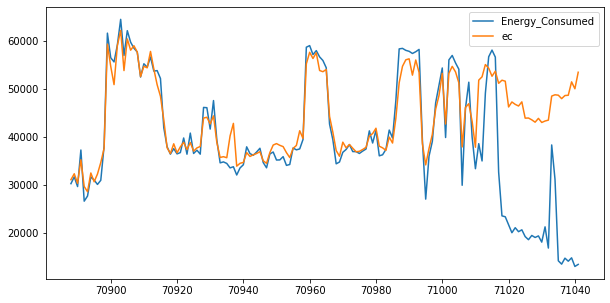

In [107]:
a[['Energy_Consumed','ec']].plot(figsize=(10,5))
# fig_dims = (15, 4)
# fig, ax = plt.subplots(figsize=fig_dims)

# ax.set_xlim(1,52)
# ax.set_xticks(range(1,52))
# ax=sns.plot(a[['Energy_Consumed','ec']],palette=palette,data=store).set_title('Store Number 2775')


In [108]:
X_test_predict

,predicted_energy
0,51797.201
1,52490.820
2,55043.466
3,54277.974
4,52606.847
5,53655.194
6,51132.292
7,51785.088
8,51571.420
9,46211.036


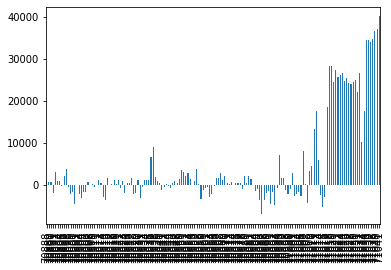

In [109]:
a['diff']=a['ec']-a['Energy_Consumed']
a['diff'].plot(kind='bar')

In [110]:
# y_train.to_frame()
# X_train_predict.values


In [111]:
from sklearn.metrics import r2_score
RSquared = r2_score(y_train, X_train_predict)

In [112]:
RSquared

0.9398097201176071

In [113]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_train, X_train_predict))

print(rmse)

2449.5760707594195


In [115]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(a['Energy_Consumed'], a['ec'])

29.26781090380104